In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import os

In [3]:
#Importing Data

df = pd.read_csv(r"C:\Users\ranji\Downloads\Kaggle/boat_data_.csv")

# Data Wrangling

In [4]:
# Display random sample of 5 rows from data 

display(df.sample(5))

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
2972,EUR 550000,Center console boat,Pershing power boats,Used boat,2007,17.60,4.80,NaN,Italy Â» Mar Tirreno,59
5012,EUR 239000,Pilothouse,Jeanneau power boats,"new boat from stock,Unleaded",2020,10.50,3.35,PVC,"France Â» BORMES LES MIMOSAS, France",54
176,EUR 12500,"Classic,Launch",NaN,Used boat,1950,6.00,2.20,Wood,Netherlands Â» Bezichtiging uitsluitend op afs...,162
7579,EUR 59000,Fishing Boat,ARS Mare power boats,Used boat,1992,11.71,4.20,GRP,Italy Â» Toscana Â» Toscana,41
6449,EUR 99000,Fishing Boat,Tiara power boats,"Used boat,Diesel",2007,10.03,3.81,GRP,Italy Â» Toscana Â» LIVORNO,61


In [5]:
shape=df.shape
print('Rows : ',shape[0])
print('Columns : ',shape[1])

Rows :  9888
Columns :  10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


# Structuring

In [7]:
#Split Price to 'currency','Price'
df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [8]:
#checking currencies

df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [9]:
#Converting prices from various currencies to EUR (Euro)

def eurprice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.02
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)

In [10]:
#Spliting Location to 'Country','City','Other'

df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

In [11]:
df_Structuring = df.drop(['Location','currency','Price','Other'],axis=1)
df_Structuring.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


# Cleaning

In [12]:
#check for missing values (NaN)

df_Structuring.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                            943
dtype: int64

In [13]:
# spliting the columns 'Boat Type' and 'Boat Type1'

df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)
df_Structuring = df_Structuring.drop(['Boat Type1'],axis=1)

In [14]:
# filling Null values in "Type" column with most frequent value that present in the column

df_Structuring['Type'].fillna(df_Structuring['Type'].value_counts().idxmax(),inplace=True)

Text(0.5, 1.0, 'Width Distribution')

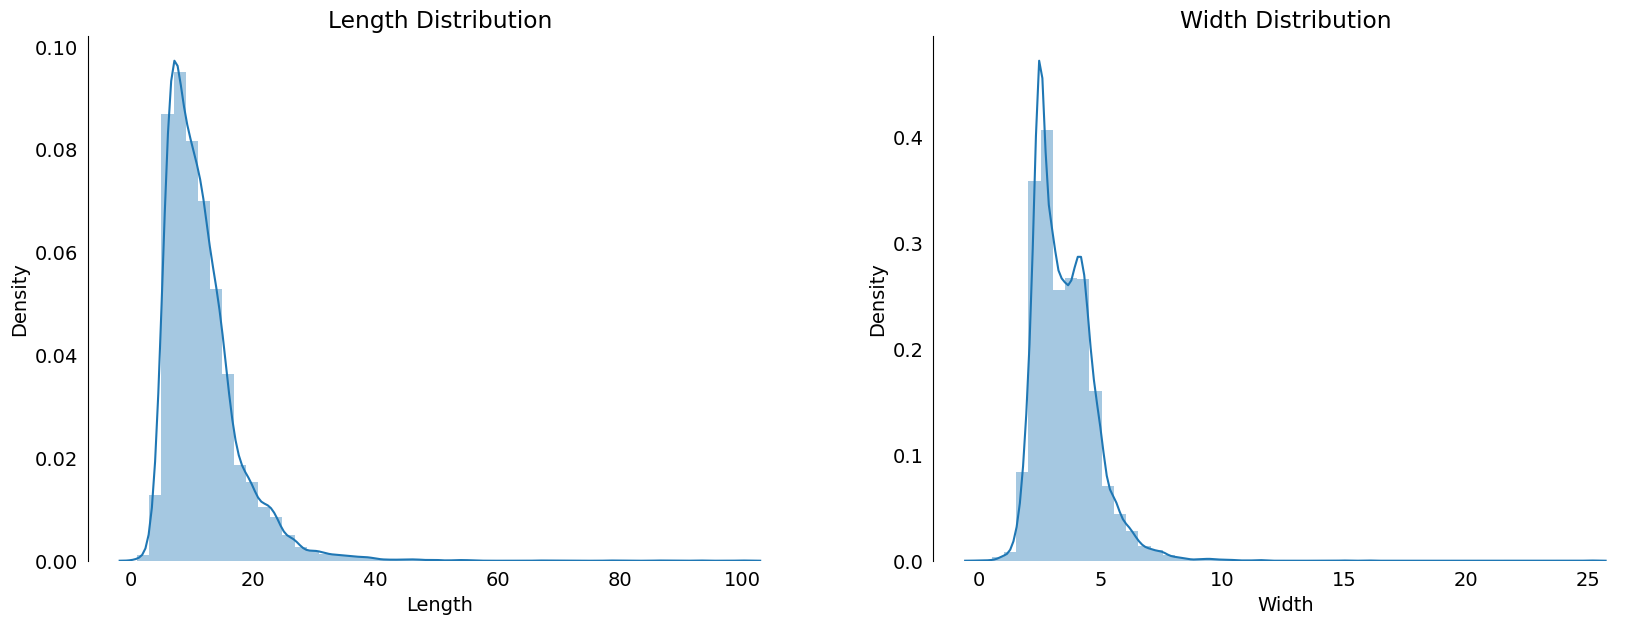

In [15]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_Structuring.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_Structuring.Width)
ax2.set_title("Width Distribution")

In [16]:
#Filling missing values

df_Structuring['Width'].fillna(df_Structuring['Width'].median(),inplace=True)
df_Structuring['Length'].fillna(df_Structuring['Length'].median(),inplace=True)

In [17]:
# filling Null values in "Material" Column with most frequent value present in the column 

df_Structuring['Material'].fillna(df_Structuring['Material'].value_counts().idxmax(),inplace=True)

In [18]:
#check for number of duplicate rows

df_Structuring.duplicated().sum()

0

In [19]:
#Removing missing values in the 'Manufacturer' or 'Country' column.

df_Cleaning = df_Structuring.dropna(subset=['Manufacturer','Country'])

In [20]:
#filling missing values in the 'Manufacturer', 'Country', and 'City' columns with the value 'None'

df_Structuring['Manufacturer'].fillna('None',inplace=True)
df_Structuring['Country'].fillna('None',inplace=True)
df_Structuring['City'].fillna('None',inplace=True)
#df_Structuring.isna().sum()

In [21]:
#check number of rows and columns in each DataFrame before and after the cleaning process

print('Befor Clean :' ,df_Structuring.shape)
print('After Clean :' ,df_Cleaning.shape)

Befor Clean : (9888, 11)
After Clean : (8521, 11)


In [22]:
#Checking for Datatype

df_Cleaning.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [24]:
# Converting the 'EUR_price' column in the DataFrame df_Cleaning to a floating-point numeric data type, allowing for mathematical 
#operations and more precise numerical representation.

df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)

# Exploratory Data Analysis

,Boat Type,Number of views last 7 days
19,Cabin Boat,250.885077
20,House Boat,260.296296
21,Classic,288.800000
22,Water ski,316.777778
23,Wakeboard/Wakesurf,373.450000


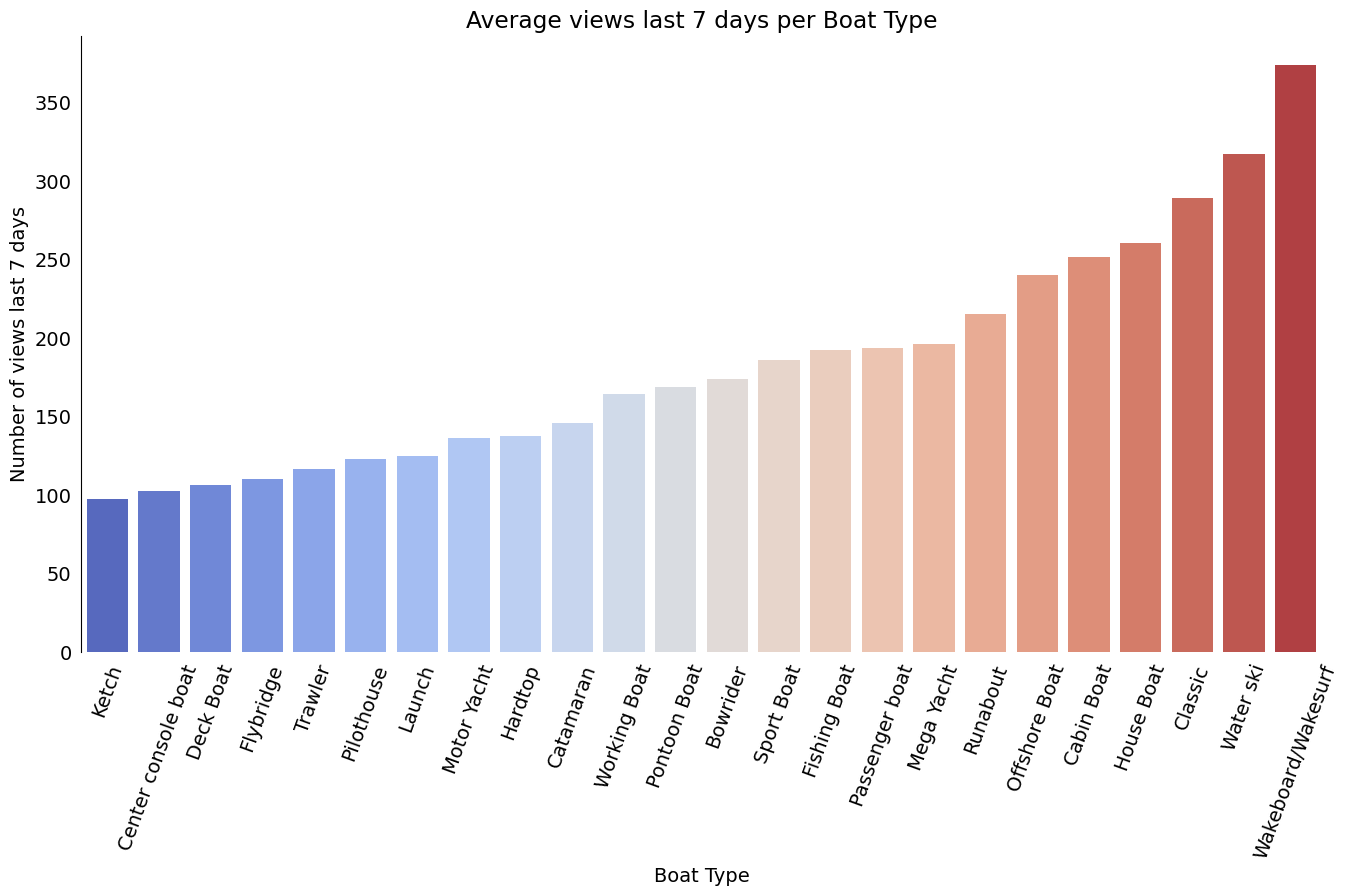

In [25]:
#Does the type of boat have an impact on the number of views it receives?

fig = plt.figure(figsize=(16,8) )
Boat_Type_View= df_Cleaning.groupby('Boat Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Boat Type', y='Number of views last 7 days', data=Boat_Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Boat Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
display(Boat_Type_View[-5:])

In [26]:
file_path = r"C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\cleaned_data.csv"

df_Cleaning.to_csv(file_path, index=False)